In [1]:
import matplotlib.pyplot as plt
import numpy as np
import hmip.hopfield as hop

def objective_function(x_1, x_2, H, q):
    
    return 1 / 2 * (H[0,0]*x_1**2+H[1,1]*x_2**2+2*H[0,1]*x_1*x_2) + q[0]*x_1 + q[1]*x_2

In [11]:
# TODO: delete plt.show()

In [12]:
help(hop)

Help on module hmip.hopfield in hmip:

NAME
    hmip.hopfield

FUNCTIONS
    absorb_solution_to_limits(x, ub, lb, absorption_val)
    
    activation(x, lb, ub, beta, activation_type)
        :param x:
        :param lb:
        :param ub:
        :param beta:
        :param activation_type:
        :return:
    
    alpha_hop(x, grad_f, direction, k, lb, ub, smoothness_coef, beta, direction_type, activation_type)
    
    compute_binary_absorption_mask(x, lb, ub, binary_indicator)
        :param x:
        :param lb:
        :param ub:
        :param binary_indicator:
        :return:
    
    find_direction(x, grad_f, lb, ub, binary_indicator, beta, direction_type, absorption, gamma, theta, activation_type)
        :param x:
        :param grad_f:
        :param lb:
        :param ub:
        :param binary_indicator:
        :param direction_type:
        :param absorption:
        :param gamma:
        :param theta:
        :param beta:
        :param activation_type:
        :retur

### case 1 

In [2]:
H = np.array([[2, 0.1], [0, 1]])
q = np.array([-2.7, -1.8])
k_max = 100
binary_indicator = np.array([0, 1])
ub = np.array([1, 1])
lb = np.array([0, 0])

x, x_h, f_val_hist, step_size = hop.hopfield(H, q, lb, ub, binary_indicator, k_max=k_max)

None


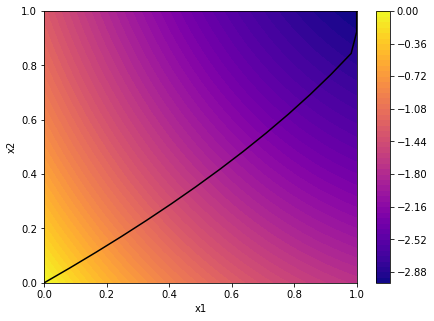

In [3]:

x_1 = np.linspace(0, 1, num=500)
x_2 = np.linspace(0, 1, num=500)
X_1, X_2 = np.meshgrid(x_1, x_2)
Z = objective_function(X_1, X_2, H, q)

plt.figure(figsize=(7, 5))
plt.contourf(X_1, X_2, Z, 50, cmap='plasma')
plt.plot(x[0, :], x[1, :],'black')
plt.colorbar()
plt.xlabel('x1')
plt.ylabel('x2')
plt.show()


### Case 2

In [15]:
H = np.array([[2, 1], [1, 2]])
q = np.array([-2.7, -1.8])
k_max = 100
binary_indicator = np.array([0, 1])
beta = 4
ub = np.array([1, 1])
lb = np.array([0, 0])
L = 1

x_armijo, x_h, f_val_hist, step_size = hopfield.hopfield(H, q, lb, ub, binary_indicator, L, k_max=k_max, step_type='armijo')
x_classic, x_h, f_val_hist, step_size = hopfield.hopfield(H, q, lb, ub, binary_indicator, L, k_max=k_max, step_type='classic')

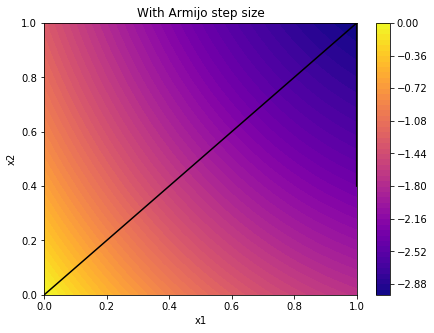

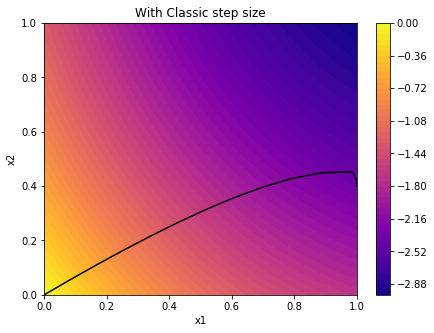

In [23]:
x_1 = np.linspace(0, 1, num=500)
x_2 = np.linspace(0, 1, num=500)
X_1, X_2 = np.meshgrid(x_1, x_2)
Z = objective_function(X_1, X_2, H, q)

plt.figure(figsize=(7, 5))
plt.contourf(X_1, X_2, Z, 50, cmap='plasma')
plt.plot(x_armijo[0, :], x_armijo[1, :],'black')
plt.colorbar()
plt.xlabel('x1')
plt.ylabel('x2')
plt.title('With Armijo step size')
plt.show()

plt.figure(figsize=(7, 5))
plt.contourf(X_1, X_2, Z, 50, cmap='plasma')
plt.plot(x_classic[0, :], x_classic[1, :],'black')
plt.colorbar()
plt.xlabel('x1')
plt.ylabel('x2')
plt.title('With Classic step size')
plt.show()

### Case 3

In [24]:
H = np.array([[2, 0], [0, 2]])
q = np.array([-8, -1])
k_max = 100
binary_indicator = np.array([0, 1])
beta = 4
ub = np.array([1, 1])
lb = np.array([0, 0])
L = 1

x, x_h, f_val_hist, step_size = hopfield.hopfield(H, q, lb, ub, binary_indicator, L, k_max=k_max)

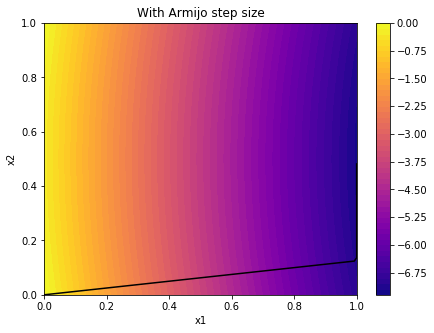

In [25]:
x_1 = np.linspace(0, 1, num=500)
x_2 = np.linspace(0, 1, num=500)
X_1, X_2 = np.meshgrid(x_1, x_2)
Z = objective_function(X_1, X_2, H, q)

plt.figure(figsize=(7, 5))
plt.contourf(X_1, X_2, Z, 50, cmap='plasma')
plt.plot(x[0, :], x[1, :],'black')
plt.colorbar()
plt.xlabel('x1')
plt.ylabel('x2')
plt.title('With Armijo step size')
plt.show()

In [26]:
H = np.array([[2, 0], [0, 1]])
q = np.array([-2.7, -1.8])
k_max = 100
binary_indicator = np.array([0, 1])
beta = 4
ub = np.array([1, 1])
lb = np.array([0, 0])
L = 1

x, x_h, f_val_hist, step_size = hopfield.hopfield(H, q, lb, ub, binary_indicator, L, k_max=k_max, absorption=True, absorption_val=0.001)

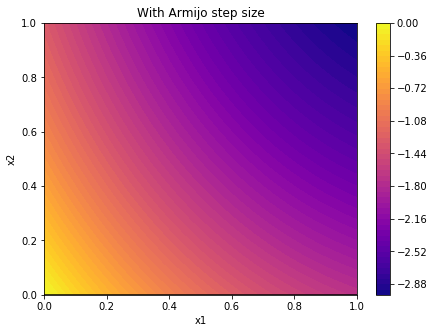

In [28]:
x_1 = np.linspace(0, 1, num=500)
x_2 = np.linspace(0, 1, num=500)
X_1, X_2 = np.meshgrid(x_1, x_2)
Z = objective_function(X_1, X_2, H, q)

plt.figure(figsize=(7, 5))
plt.contourf(X_1, X_2, Z, 50, cmap='plasma')
plt.plot(x[0, :], x[1, :],'black')
plt.colorbar()
plt.xlabel('x1')
plt.ylabel('x2')
plt.title('With Armijo step size')
plt.show()

In [36]:
n = 100

H = np.array([[2, 0], [0, 1]])
q = np.array([-2.7, -1.8])
k_max = 500

beta = 4
ub = np.array([1, 1])
lb = np.array([0, 0])
L = 1
gamma = 0.9
theta = np.pi / 2 - 0.1
absorption = False
absorption_val = 0.01
initial_state = 0.5 * np.ones(n)

binary_indicator = np.zeros(n)
for k in range(1, n):
    if np.random.rand() > 0.5:
        binary_indicator[k] = 1
        
        
beta = np.ones(n)
if method.temperature.str is 'auto' or method.temperature.str is 'semi auto':
    for k in range (1,n):
        if p.binary_indicator(k)==1:
            if method.temperature.str is 'auto':
                p.beta[k]=10;
            elif (method.temperature.str is 'semi auto'):
                p.beta[k]=method.temperature.val;
            end
        end
    end
    
end

NameError: name 'method' is not defined